## <span style="color:blue"> Computer Vision - Winter 2024

## <span style="color:blue"> Exercise 1 </span>
**Reichman University**

**Lecturer:** Prof. Yael Moses, RUNI

**TA:** Eyal Friedman, RUNI

**Submission date: 10.1.24** \
Note: In case you need an extension for any reason, you can submit it by 14.1.24. \
No extra extensions will be given.

**Your name: [Your Name]**
**Your ID: [Your ID]**

In this exercise, you will practice basic image operations such as loading, saving, and displaying an image, getting familiar with 'numpy,' and understanding the benefits of vectorized operations in Python. This exercise contains three parts:

1. Image Convolution.
2. Implementing a classic Harris corner Detector.
3. Answering questions.

## <span style="color:blue"> Submission guidelines:</span>

1. Your **zip** file should include the following files only:
   - ex1.ipynb
   - images you use
2. You should use Jupyter Notebook.
3. Name the zip file **'ex1_ID_ID.zip'** and **do not** include any additional directories.
4. Submit using *Moodle*.
5. Submit on time!
6. You can submit this assignment in pairs (no triplets).
   * In the case of pair submission, both IDs and names should be added to the notebook.
   * One should submit the homework, and the other should submit a simple text file named: ID_ID.txt and nothing else.
   *Please make sure that your collaborator submits the HW.

## Read the following instructions carefully:

1. Write **efficient vectorized** code. When you think you cannot use vectorized code, give a short explanation of why.
2. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests unless requested.
3. Use `Python 3` and `numpy 1.18.5` or above. Changes to the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden unless provided by us.
5. Your code must run without errors. Note, **Code that fails to run will not be graded.**
6. Document your code properly.
7. Go over Warmup Python - you can find relevant python functions that will make your life easier.


## Honor Code:
The assignment is a basic tool for learning the material. You can probably find the solution on the web (including ChatGPT), however, you will not learn what you should learn from it. In addition, since we give grades on the assignment, using existing solutions will be considered dishonest.
In particular, you are not allowed to copy or use any code that solve the tasks. 
You are more than welcome to talk with your friends, but you are not allowed to give your code or answers and you are not allowed to use their code or answers. 
Remember – you take this course in order to learn.

## I declair that I respcet the honor code:
<span style="color:red"> Add here your names: 


In [21]:
import cv2
import sys
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy.ndimage import maximum_filter
import numpy as np
from scipy.signal import convolve2d

# specify the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'
np.set_printoptions(precision=2, suppress=True)


In [22]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.10.11
Numpy version:  1.23.5


## <span style="color:black">Section A: Convolution 
In this part, you will need to write a function **convolvedImage = convolutionMask(img,mask)**  which gets a 2D np.array of a grey level image and a convolution mask (Kernel) and output the convolved image with your mask. It also should plot  the original image and the convolved image side by side. Use captions on each image that indicates what you present. (Hint: see example in Warmup Python in Moodle)\
You may use the convolve2d function from scipy.signal.\
**Note:** Make sure that you understand the differences between correlation and convolution.\
Suggest a convolution mask for each of the 4 cases: 
    
1. Mask1:  a convolution mask (kernel)  that computes the average of a 5x5 pixels around each pixel. 
   
    
2. Mask2:  a convolution mask (kernel) of size *5×5* such that the maximal value over all possible grey level images (range 0 to 255) will be obtained in the center of a widnow that contains a black  shape region surrounded by white pixels (see the region below).  Note, the rest of the image may contain any values.

    The shape region:
    
   ``  
      255 255 255 255 255
     255  0  255 255 255
     255  0   0   0  255
     255  0   0  255 255
     255 255 255 255 255
     ``

3. Let '*' be a don't care value.\
    Mask3:  a mask as defined in  2 above  but for the following region:
    
    ``  
    0    0     0    0    0
    0    *    255   *    0
    0   255   255  255  255
    0    *    255   0    0
    0    0     0    0    0
      ``
4. Maks 4: a convolution mask (kernel)  that computes a 3 pixel shift of the image to the right.\
    You can ignore the results along the border of the image.

**Submit your function below**. 


In [23]:
# This function will be part your functions' test - do not change it
# You may add any helper function for your implementation and to write your code in the cell below

def test_A(imageName):
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)
    print("mask1:")
    convolvedImage1 = convolutionMask(img,mask1)
    print("mask2:")
    convolvedImage2 = convolutionMask(img,mask2)
    print("mask3:")
    convolvedImage3 = convolutionMask(img,mask3)
    print("mask4:")
    convolvedImage4 = convolutionMask(img,mask4)


def test_B(image2, image3):
    print("mask1:")
    convolvedImage1 = convolutionMask(image2,mask1)
    print("mask2:")
    convolvedImage2 = convolutionMask(image2,mask2)
    max_index = np.unravel_index(np.argmax(convolvedImage2, axis=None), convolvedImage2.shape)
    print("max indices: ", max_index)
    print("mask3:")
    convolvedImage3 = convolutionMask(image3,mask3)
    max_index = np.unravel_index(np.argmax(convolvedImage3, axis=None), convolvedImage3.shape)
    print("max indices: ", max_index)
    print("mask4:")
    convolvedImage4 = convolutionMask(image2,mask4)

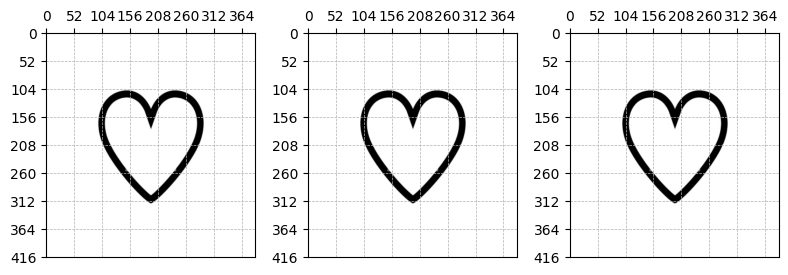

In [87]:
# For each call of the funtion, show on screen the result of your function.
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec



def convolutionMask(img,mask):
    img2 = np.empty_like(img)
    img2 = convolve2d(img, mask, mode='same', boundary='wrap')
    show2Images(img, img2)
    # old_min = img2.min()
    # old_max = img2.max()
    # img2 = (((img2 - old_min) * 255) / (old_max - old_min)).astype(int)
    return img2

def show1Image(base):
    # f = plt.figure(figsize=(base.shape[1]/40, base.shape[0]/40))
    f = plt.figure()
    f.add_subplot(1, 2, 1)
    plt.imshow(base)
    ax = plt.gca()
    ax.xaxis.tick_top()
    ax.xaxis.set_major_locator(MultipleLocator(int(base.shape[0]/10)))
    ax.yaxis.set_major_locator(MultipleLocator(int(base.shape[0]/10)))
    ax.grid(which='major', linestyle='--', linewidth=0.5)
    ax.grid(which='minor', linestyle='--', linewidth=0.25)

def show2Images(base, conv):
    f = plt.figure()
    plt.tight_layout()
    f.add_subplot(1, 2, 1)
    plt.imshow(base)
    ax = plt.gca()
    ax.xaxis.tick_top()
    ax.xaxis.set_major_locator(MultipleLocator(int(base.shape[0]/10)))
    ax.yaxis.set_major_locator(MultipleLocator(int(base.shape[0]/10)))
    ax.grid(which='major', linestyle='--', linewidth=0.5)
    ax.grid(which='minor', linestyle='--', linewidth=0.25)
    f.add_subplot(1, 2, 2)
    plt.imshow(conv)

    ax = plt.gca()
    ax.xaxis.tick_top()
    ax.xaxis.set_major_locator(MultipleLocator(int(base.shape[0]/10)))
    ax.yaxis.set_major_locator(MultipleLocator(int(base.shape[0]/10)))
    ax.grid(which='major', linestyle='--', linewidth=0.5)
    ax.grid(which='minor', linestyle='--', linewidth=0.25)
    plt.show(block=True)

def show3Images1(img1, img2, img3):
    f = plt.figure()
    f.add_subplot(1, 3, 1)
    plt.imshow(img1)
    ax1 = plt.gca()
    ax1.xaxis.tick_top()
    ax1.xaxis.set_major_locator(MultipleLocator(int(img1.shape[0]/10)))
    ax1.yaxis.set_major_locator(MultipleLocator(int(img1.shape[0]/10)))
    ax1.grid(which='major', linestyle='--', linewidth=0.5)
    ax1.grid(which='minor', linestyle='--', linewidth=0.25)
    
    f.add_subplot(1, 3, 2)
    plt.imshow(img2)
    ax2 = plt.gca()
    ax2.xaxis.tick_top()
    ax2.xaxis.set_major_locator(MultipleLocator(int(img1.shape[0]/10)))
    ax2.yaxis.set_major_locator(MultipleLocator(int(img1.shape[0]/10)))
    ax2.grid(which='major', linestyle='--', linewidth=0.5)
    ax2.grid(which='minor', linestyle='--', linewidth=0.25)
    plt.show(block=True)

    f.add_subplot(1, 3, 3)
    plt.imshow(img3)
    ax3 = plt.gca()
    ax3.xaxis.tick_top()
    ax3.xaxis.set_major_locator(MultipleLocator(int(img1.shape[0]/10)))
    ax3.yaxis.set_major_locator(MultipleLocator(int(img1.shape[0]/10)))
    ax3.grid(which='major', linestyle='--', linewidth=0.5)
    ax3.grid(which='minor', linestyle='--', linewidth=0.25)
    plt.show(block=True)

def show3Images0(img1,img2,img3):
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(1, 3)

    fig = plt.figure(0)
    fig.clf()

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])

    plt.imshow(img1)
    ax1 = plt.gca()
    ax1.xaxis.tick_top()
    ax1.xaxis.set_major_locator(MultipleLocator(int(img1.shape[0]/10)))
    ax1.yaxis.set_major_locator(MultipleLocator(int(img1.shape[0]/10)))
    ax1.grid(which='major', linestyle='--', linewidth=0.5)
    ax1.grid(which='minor', linestyle='--', linewidth=0.25)
    

    plt.imshow(img2)
    ax2 = plt.gca()
    ax2.xaxis.tick_top()
    ax2.xaxis.set_major_locator(MultipleLocator(int(img2.shape[0]/10)))
    ax2.yaxis.set_major_locator(MultipleLocator(int(img2.shape[0]/10)))
    ax2.grid(which='major', linestyle='--', linewidth=0.5)
    ax2.grid(which='minor', linestyle='--', linewidth=0.25)

    plt.imshow(img3)
    ax3 = plt.gca()
    ax3.xaxis.tick_top()
    ax3.xaxis.set_major_locator(MultipleLocator(int(img3.shape[0]/10)))
    ax3.yaxis.set_major_locator(MultipleLocator(int(img3.shape[0]/10)))
    ax3.grid(which='major', linestyle='--', linewidth=0.5)
    ax3.grid(which='minor', linestyle='--', linewidth=0.25)

def show3Images(img1, img2, img3):
        
    # Create a figure
    fig = plt.figure()  # Adjust the figsize as needed

    # Add three subplots in a horizontal layout
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)

    # Plot the images in the subplots
    ax1.imshow(img1, cmap='gray')  # Replace 'gray' with the desired colormap
    ax1.grid(which='major', linestyle='--', linewidth=0.5)
    ax1.grid(which='minor', linestyle='--', linewidth=0.25)
    ax1.xaxis.tick_top()
    ax1.xaxis.set_major_locator(MultipleLocator(int(img3.shape[0]/8)))
    ax1.yaxis.set_major_locator(MultipleLocator(int(img3.shape[0]/8)))

    ax2.imshow(img2, cmap='gray')
    ax2.grid(which='major', linestyle='--', linewidth=0.5)
    ax2.grid(which='minor', linestyle='--', linewidth=0.25)
    ax2.xaxis.tick_top()
    ax2.xaxis.set_major_locator(MultipleLocator(int(img3.shape[0]/8)))
    ax2.yaxis.set_major_locator(MultipleLocator(int(img3.shape[0]/8)))

    ax3.imshow(img3, cmap='gray')
    ax3.grid(which='major', linestyle='--', linewidth=0.5)
    ax3.grid(which='minor', linestyle='--', linewidth=0.25)
    ax3.xaxis.tick_top()
    ax3.xaxis.set_major_locator(MultipleLocator(int(img3.shape[0]/8)))
    ax3.yaxis.set_major_locator(MultipleLocator(int(img3.shape[0]/8)))

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the figure
    plt.show()

img = cv2.imread("heart1.jpg")
show3Images(img,img,img)


In [25]:
# Masks:

mask1 = [[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]]

M_2_base = [[255, 255, 255, 255, 255],
            [255,  0, 255, 255, 255],
            [255, 0, 0, 0, 255],
            [255, 0, 0, 255, 255],
            [255, 255, 255, 255, 255]]
mask2 = 1/np.linalg.pinv(M_2_base)
push_down = np.zeros((5, 1))
push_down[3][0] = 1
mask2 = convolve2d(mask2, push_down, mode='same')

# set * value
ast = 150
M_3_base = np.array([[0,   0,   0,   0,   0],
                    [0,   ast,  255,  ast,   0],
                    [0, 255,  255, 255, 255],
                    [0,   ast,  255,   0,   0],
                    [0,   0,   0,   0,   0]])
mask3 = np.array([[0,   0,   0,   0,   0],
                  [0, 0, -1/255, 0,  0],
                  [0,  -1,  1/255,  -1, -1],
                  [0, 0, -1/255, 0,    0],
                  [0,   0,   0,   0,   0]])
mask3 = mask3+sys.float_info.epsilon
mask3 = 1/mask3
inverse_k = np.zeros((1, 1))
inverse_k[0][0] = -1
mask3 = convolve2d(mask3, inverse_k, mode='same')

mask4 = [[0, 0, 0, 0, 0, 0, 1]]

center of pattern in: ( 21 ,  6 )

mask1:


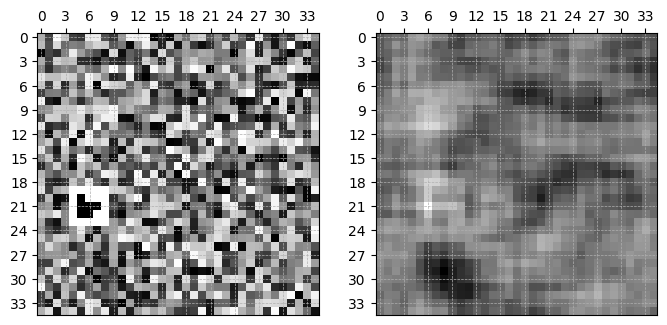

mask2:


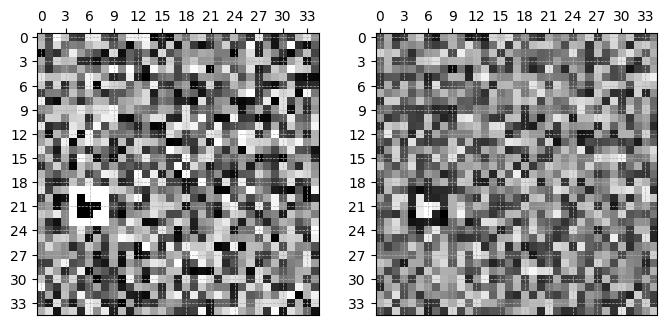

max indices:  (21, 6)
mask3:


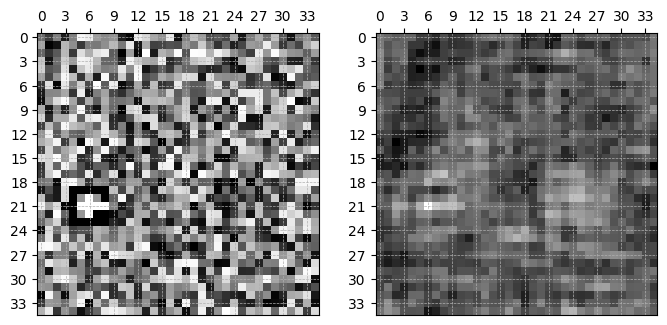

max indices:  (21, 6)
mask4:


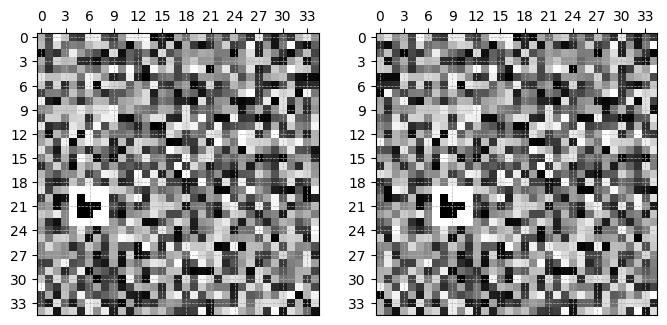

In [55]:
# set image dimentions
dimx, dimy = 35, 35
i, j = random.randint(3, dimx-6), random.randint(3,
                                                 dimy-6)  # i for y axis, j for x axis
print("center of pattern in: (", i+2,", ", j+2, ")\n")

# uncommment to init toy image:
# img_2, img_3 = np.full((dimx, dimy), 255), np.full((dimx, dimy), 255)
# uncommment to init random image:
img_2, img_3 = np.random.randint(0, 256, size=(dimx, dimy), dtype=np.uint8),np.random.randint(0, 256, size=(dimx, dimy), dtype=np.uint8)


img_1 = "heart1.jpg"
img_2[i:i+len(M_2_base[0]), j:j+len(M_2_base[1])] = M_2_base
img_3[i:i+len(M_3_base[0]), j:j+len(M_3_base[1])] = M_3_base
# uncommment to test with heart image:
# test_A(img_1)
# uncommment to test with created images:
test_B(img_2, img_3)



## <span style="color:blue"> **Section B: Corner Detector**
    
In this section, you will implement the Harris corner detector as covered in class. Refer to the slides of the algorithm details.

Reference to the original paper: A COMBINED CORNER AND EDGE DETECTOR, Harris \& Stephens, Alvey Vision Conference, 1988

You will write the function:\
_Corners_ = H_corner(_im_, _σ _smooth_, _σ _neighb_, _th_, _density_size_, _display_).\
You may add additional parameters if necessary - list them and explain their role.

_im_: a grey-level image.\
_corners_: $k\times 2$ array that consists of the $x$ and $y$ coordinates of each of the $k$  detected corners.\
_display_: a binary parameter.\
Other parameters are described below.
    
    
## <span style="color:blue"> **B1 - Implement Harris**  
    
As part of the algorithm, you should implement the following:
    
1. Compute two kernels with the derivative of a Gaussian: **G_dx, G_dy  = Deriv_Gauss_xy(_sigma_)**.\
   **Note**:\
    (i) Refer to 'Warmup Python' for an example of defining a mask using a function. Modify the Gaussian example to a
    derivative of a Gaussian.\
    (ii) The mask_size should be around 6$\sigma_{smooth}$+1. 
    You can check and see if smaller or larger mask size affect the results. You can also look at the plot of the mask. The values close to the border of the masks should be close to zero. On the other hans, the border containing these values are not too wide. Think what it means if this is not the case.\
   **A question for thought (not for submission)**: what is the expected sum of the elements in the kernel? 
    
2. Using these masks compute two matrixes, $I_x$ and $I_y$, with the derivatives of the image in the $x$ and in the $y$ directions, respectively:\
    **Ix, Iy = Grad_xy(img,  $\sigma_{smooth}$)**
3. Compute the following three matrices: $I_x^2$, $I_y^2$,  $I_x$  and $I_y$.
4. Compute the four matrices, C11, C12, C22,  each corresponds to a different entry of the matrix for C for all pixels of the image. These matrices are computed by convolving the matrices computed in (3) with a Gaussian defined by $\sigma_{neighb}$.
4. Compute for each pixel, $q$ the eigen value and the eigen vector of its $C(q)$ matrix. Note that in this case you cannot perform it using vectorize operations.\
    or 
    Compute $d(q)= det(C)-k\cdot Trace(C)^2$.  For this case you will need an additional paramter $k$, but you can compute it efficiently using vectorize operations.
5. Threshold the small eignevalue of each pixel,  using the parameter $th$ (or do the same to $d(q)$).\
    Set to zero those pixles that are below the threshold.
6. For each region of size  denisty_size, leave the maximal small eigenvalue value (or smallest $d(q)$).

Return a list of corneres:  the indexes of the corners, and their strength.\
If display = 1, then display as part of the function (as in the class slides):\
a. The original image.\
b. The derivatives of the images, $I_x$ and $I_y$.
         (This is in addition to what is presented in the slides.)\
c. The values of the corner strength before appying the threshold. (Can be in greyscale rather than color. Make sure to normalize it for display.)\
d. The values of the corner strength after appying the threshold. (This should be a binary image.)\
e. The detected corners overlayed on the original image.




In [27]:
def plot3d(data):
    height, width = data.shape[0], data.shape[1]
    print(height, width)
    y = np.arange(-width/2,width/2,  1)
    x = np.arange(-height/2,height/2,  1) 
    print(x)
    print(y)
    x, y = np.meshgrid(y, x)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(x, y, data, cmap='viridis')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('Gaussian 3D Surface')
    plt.show()

In [28]:
def Deriv_Gauss_xy(sig=2):
    size = 6*sig+1
    x = np.arange(-size/2, size/2, 1)
    y = np.arange(-size/2, size/2, 1)
    x, y = np.meshgrid(x, y)
    G = (1/(2*np.pi*sig**2))*np.exp(-(np.square(x) + np.square(y))/(2*sig**2))

    gaussian_first_deriv_x = np.multiply(G, -x)/sig**2
    gaussian_first_deriv_y = np.multiply(G, -y)/sig**2

    return gaussian_first_deriv_x, gaussian_first_deriv_y


def Grad_xy(img, sig_smooth=2):
    kernelx, kernely = Deriv_Gauss_xy(sig_smooth)
    return convolve2d(img, kernelx), convolve2d(img, kernely)


In [29]:
def retain_max_in_neighborhood(matrix, radius):
    # Create a binary mask to define the neighborhood
    neighborhood_mask = np.zeros((2 * radius + 1, 2 * radius + 1), dtype=bool)
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    neighborhood_mask = x**2 + y**2 <= radius**2

    # Use scipy's maximum filter to get the local maximum in each neighborhood
    max_values = maximum_filter(matrix, footprint=neighborhood_mask)

    # Set all values to zero except for the maximum value in each neighborhood
    result = np.where(matrix == max_values, matrix, 0)

    return result


def apply_threshhold(matrix, thresh):
    mask = matrix > thresh
    result_matrix = np.where(mask, matrix, 0)
    indices = np.argwhere(mask)
    return result_matrix, indices


base image
Ix Iy


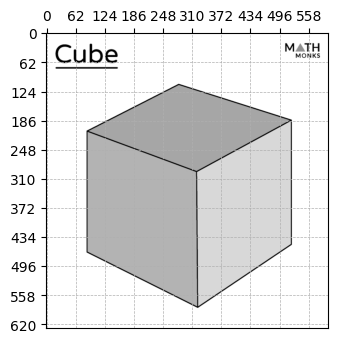

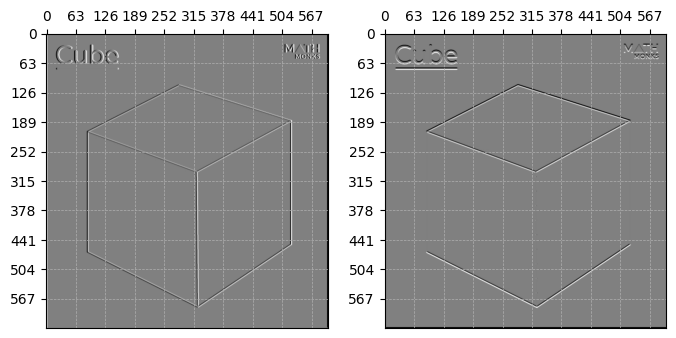

Ix2 Iy2 IxIy


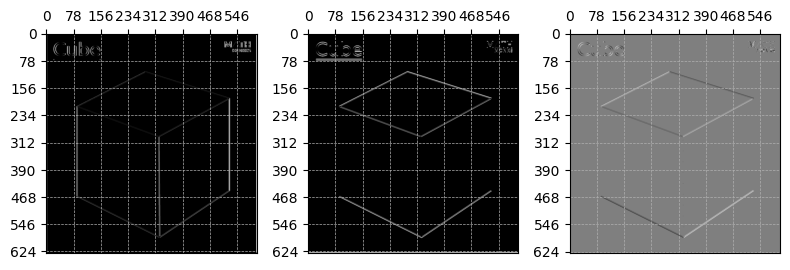

detector final result
found  24  corners in the picture


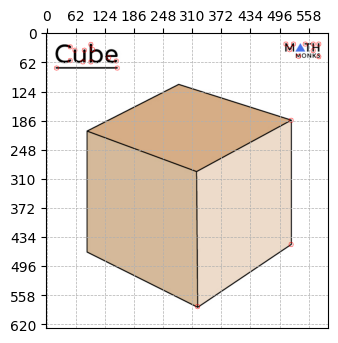

In [108]:

def harris_detector(img_dir, sig_neigh, sig_smooth, density_size, threshold, display=1, k=0.04):
    img = cv2.imread(img_dir)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height = img.shape[0]
    width = img.shape[1]
    C = np.zeros((height, width))

    Ix, Iy = Grad_xy(gray, sig_smooth)

    Ix2 = np.square(Ix)
    Iy2 = np.square(Iy)
    IxIy = Ix*Iy

    offset = int(sig_neigh / 2)
    for y in range(sig_neigh, height-sig_neigh):
        for x in range(sig_neigh, width-sig_neigh):
            Ix2_local = Ix2[y-offset:y+1+offset, x-offset:x+1+offset]
            Iy2_local = Iy2[y-offset:y+1+offset, x-offset:x+1+offset]
            IxIy_local = IxIy[y-offset:y+1+offset, x-offset:x+1+offset]

            C11 = np.sum(Ix2_local)
            C22 = np.sum(Iy2_local)
            C12 = np.sum(IxIy_local)
            Cq = np.array([[C11, C12], [C12, C22]])
            eigenvalues, eigenvectors = np.linalg.eigh(Cq)
            D = np.diag(eigenvalues)
            determinant = np.linalg.det(Cq)
            trace = np.matrix.trace(Cq)
            C[y-offset, x-offset] = determinant-k*(trace**2)

    C_max_points = retain_max_in_neighborhood(C, density_size)
    cv2.normalize(C_max_points, C_max_points, 0, 1, cv2.NORM_MINMAX)
    C_max_points, corners = apply_threshhold(C_max_points, threshold)

    if(display==1):
        print("base image")
        show1Image(gray)
        print("Ix Iy")
        show2Images(Ix, Iy)
        print("Ix2 Iy2 IxIy")
        show3Images(Ix2, Iy2, IxIy)
        for pt in corners:
            cv2.circle(img,(pt[1],pt[0]),5,(255,0,0))
        print("detector final result")
        show1Image(img)
    print("found ", corners.shape[0]," corners in the picture")
    return corners


# test detector
corners = harris_detector("cube1.jpg", 5, .5, 10, 0.3, 1)
# print(corners)

## <span style="color:blue"> **B2 - Apply and explore**. 
In this part you will apply your Harris corner detector and explore its parameters 
Test:
1. Write a script that produces all the required tests.  
2. Suggest a synthetic image to test your algorithm, and present both the image and the results.
3. Test your functions on an image of your choice, exploring various parameters to achieve a 'good' result.\
    Display the results using different parameter values. Provide two images for each parameter to demonstrate its effect on the results. Use the 'title()' function to clarify which pair of parameters is used.
5. Summarize the effects of each parameter on corner detection in your answer.
6. Choose a set of parameters and apply the algorithm to the two images:  view0.tif and view6.tif.
Determine whether the same corners appear in both images. If not, mark an example of a corner that appears on one of the images and not on the other. Provide a possible explanation for why a corner was not found in the other image.
7. List the 3 most interesting things that you learned from this assignment.
8. What was the most non-trivial part of the assignent.

**Submit below as a text or as uploaded image of your text written in a different format**
